Import Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

In [112]:
data=pd.read_csv('Dataset.csv')

In [113]:
data.shape

(614, 13)

In [114]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


PREPROCESSING

1. Handling Missing Values

In [115]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [116]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [117]:
data.shape

(614, 12)

In [118]:
#filling missing values using mode
#Gender,Married,Dependents,Self_Employed,Credit_History 
#these columns are categorical so we will use mode to fill missing values if we use mean or median it will add noise to the data
for col in ['Gender','Married','Dependents','Self_Employed','Credit_History']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [119]:
#LoanAmount,Loan_Amount_Term are numerical columns so we will use median to fill missing values
for col in ['LoanAmount','Loan_Amount_Term']:
    data[col].fillna(data[col].mean(), inplace=True)

In [120]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

2. Label Encoding for binary value columns

In [121]:
le=LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = le.fit_transform(data[col])

<Axes: >

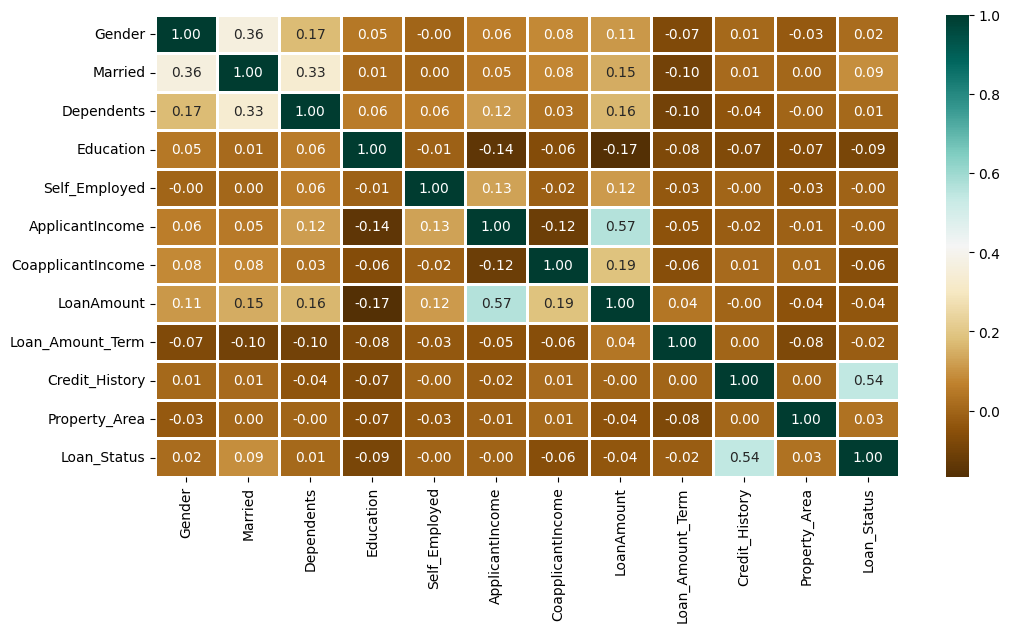

In [122]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

Observations:-
credit_history vs loan_status has strong +ve correlation means Applicants with a good credit history are much more likely to get loan approval.
ApplicantIncome vs LoanAmount strong correlation higher income,higher eligible for loan.

3. Splitting the Data

In [123]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']
#80% of the data will be used for training and 20% for testing
#random state is used to ensure that the split is same every time we run the code.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Model Training and Evaluation

-> knn algorithm classifies the data point based on how its neighbors.           
-> Random Forest Classifier ann ensemble model,builds multiple decision trees and combines their results.                                                  
-> Support Vector Classifier tries to find the best hyperplane that separates classes in feature space

In [124]:
knn = KNeighborsClassifier(n_neighbors=3)#the algorithm looks at the 3 closest points
rfc = RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)#7 decision trees,Splits trees using information gain
svc = SVC()

In [125]:
#prediction trainning dataset
for model in (knn,rfc,svc):
    model.fit(x_train,y_train)
    Y_pred=model.predict(x_train)
    print("accuracy score of",model.__class__.__name__,"=",
          100*metrics.accuracy_score(y_train,Y_pred))

accuracy score of KNeighborsClassifier = 77.59674134419552
accuracy score of RandomForestClassifier = 98.57433808553971
accuracy score of SVC = 70.26476578411406


In [126]:
#prediction test dataset
for model in (knn,rfc,svc):
    model.fit(x_test,y_test)
    Y_pred=model.predict(x_test)
    print("accuracy score of",model.__class__.__name__,"=",
          100*metrics.accuracy_score(y_test,Y_pred))


accuracy score of KNeighborsClassifier = 76.42276422764228
accuracy score of RandomForestClassifier = 96.7479674796748
accuracy score of SVC = 65.04065040650406


In [127]:
new_user=[[1, 1, 0, 0, 0, 5000, 2000, 120, 360, 1, 2]]  
prediction = rfc.predict(new_user)
if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")


Loan Approved


In [128]:
new_user=[[1, 1, 0, 0, 0, 5000, 2000, 120, 360, 1, 2]]  
prediction = svc.predict(new_user)
if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")


Loan Approved


In [129]:
new_user=[[1, 1, 0, 0, 0, 5000, 2000, 120, 360, 1, 2]]  
prediction = knn.predict(new_user)
if prediction[0]==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")


Loan Not Approved


In [130]:
new_user2=[[0,0,1,1,1,10000,0,100000,360,0,1]]
prediction = rfc.predict(new_user2)
if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


In [131]:
new_user2=[[0,0,1,1,1,10000,0,100000,360,0,1]]
prediction = svc.predict(new_user2)
if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved


In [132]:
new_user2=[[0,0,1,1,1,10000,0,100000,360,0,1]]
prediction = knn.predict(new_user2)
if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved


In [ ]:
#Pickle is a Python module used to save Python objects to a file and load them back later.
#This process is called serialization (saving) and deserialization (loading).
import pickle
pickle.dump(knn, open("knn_model.pkl", "wb"))
pickle.dump(svc, open("svm_model.pkl", "wb"))
pickle.dump(rfc, open("rfc_model.pkl", "wb"))
